In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # graph
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
por = pd.read_csv("stud.csv")

In [3]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
len(por)

649

In [5]:
por.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
por.school.value_counts(normalize=True)

school
GP    0.651772
MS    0.348228
Name: proportion, dtype: float64

In [7]:
print("%s%% of the students are in Gabriel Pereira school" % (100*round(por.school.value_counts(normalize=True)[0],4)))

65.18% of the students are in Gabriel Pereira school


In [8]:
por.sex.value_counts(normalize=True)

sex
F    0.590139
M    0.409861
Name: proportion, dtype: float64

In [9]:
print("%s%% of the students are girls" % (100*round(por.sex.value_counts(normalize=True)[0],4)))

59.01% of the students are girls


<Axes: xlabel='school', ylabel='count'>

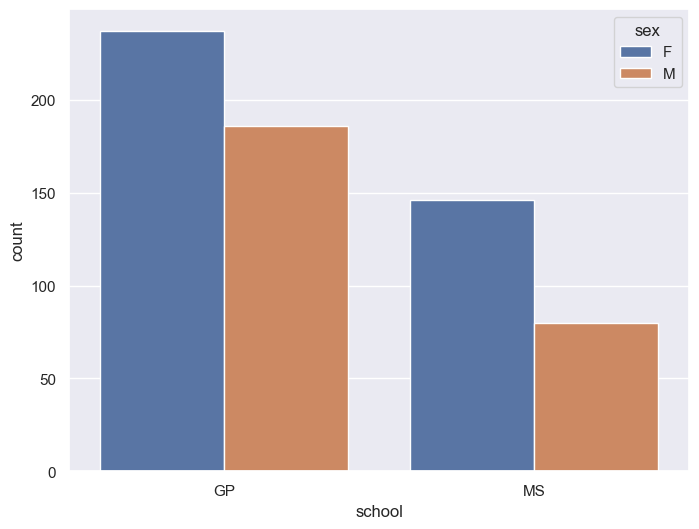

In [10]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x="school", hue ="sex", data=por)

Disimpulkan bahwa murid bergender Wanita (F) mendominasi di kedua sekolah (GP and MS)

<Axes: xlabel='age', ylabel='count'>

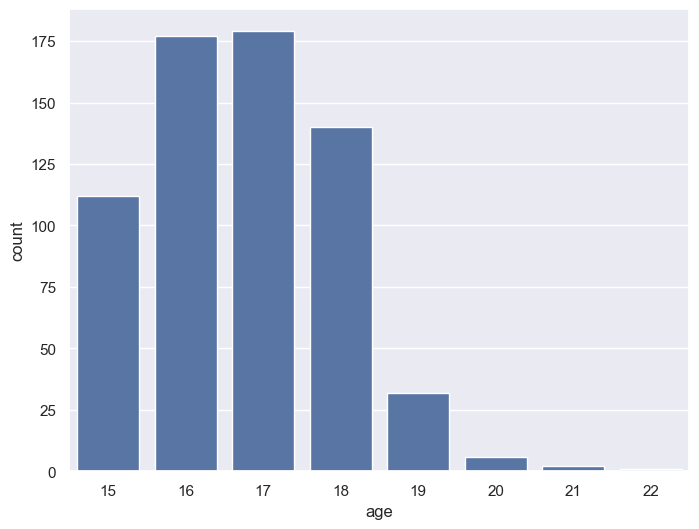

In [11]:
sns.countplot(data=por, x='age')


Disimpulkan bahwa usia murid dominasi adalah usia 17 lalu diikuti usia 16, 18, 15, 19, dan 21

In [12]:
por.address.value_counts(normalize=True)

address
U    0.696456
R    0.303544
Name: proportion, dtype: float64

In [13]:
print("%s%% of the students live in an urban area" % (100*round(por.address.value_counts(normalize=True)[0],4)))

69.65% of the students live in an urban area


In [14]:
por.famsize.value_counts(normalize=True)

famsize
GT3    0.70416
LE3    0.29584
Name: proportion, dtype: float64

In [15]:
print("%s%% of the students live in a family with more than 3 members" % (100*round(por.famsize.value_counts(normalize=True)[0],4)))

70.42% of the students live in a family with more than 3 members


<Axes: xlabel='school', ylabel='count'>

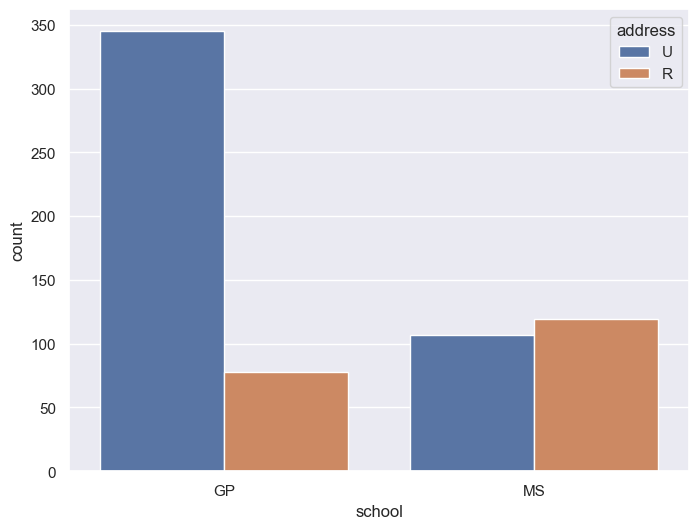

In [16]:
sns.countplot(x="school", hue ="address", data=por)

In [17]:
por.Pstatus.value_counts(normalize=True)

Pstatus
T    0.876733
A    0.123267
Name: proportion, dtype: float64

In [18]:
print("%s%% of the students' parents live together" % (100*round(por.Pstatus.value_counts(normalize=True)[0],4)))

87.67% of the students' parents live together


<Axes: xlabel='Pstatus', ylabel='count'>

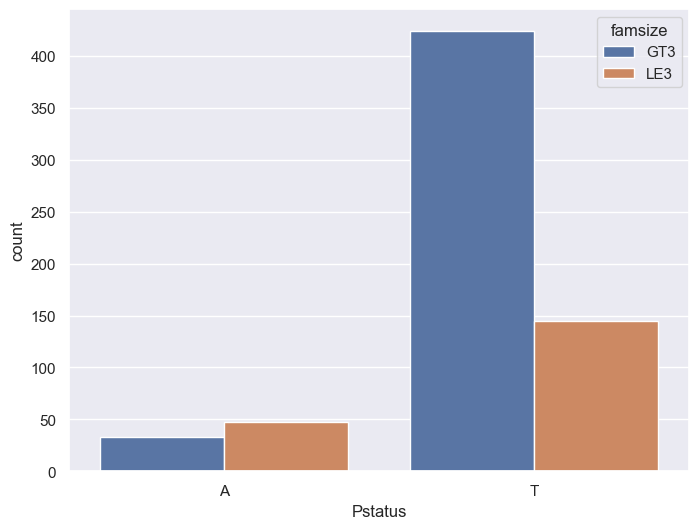

In [19]:
sns.countplot(x="Pstatus", hue ="famsize", data=por)

Disimpulkan bahwa mayoritas status keluarga siswa adalah keluarga yang masih tinggal bersama dengan mayoritas tinggal dengan lebih dari 3 anggota keluarga

<Axes: xlabel='Medu', ylabel='count'>

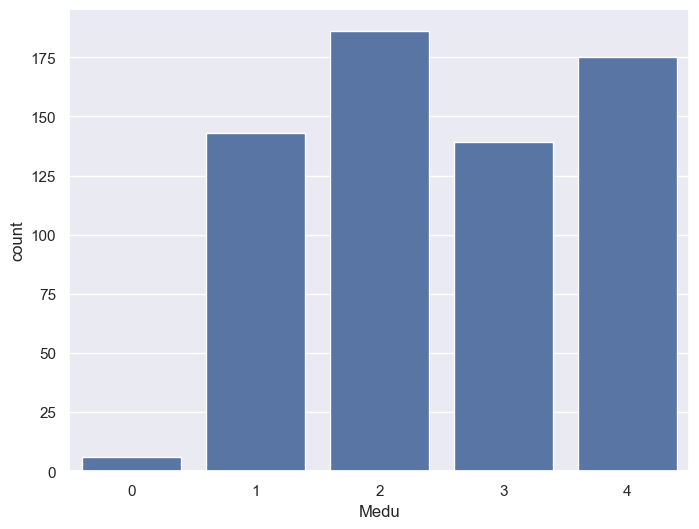

In [20]:
sns.countplot(data=por, x='Medu')


<Axes: xlabel='Fedu', ylabel='count'>

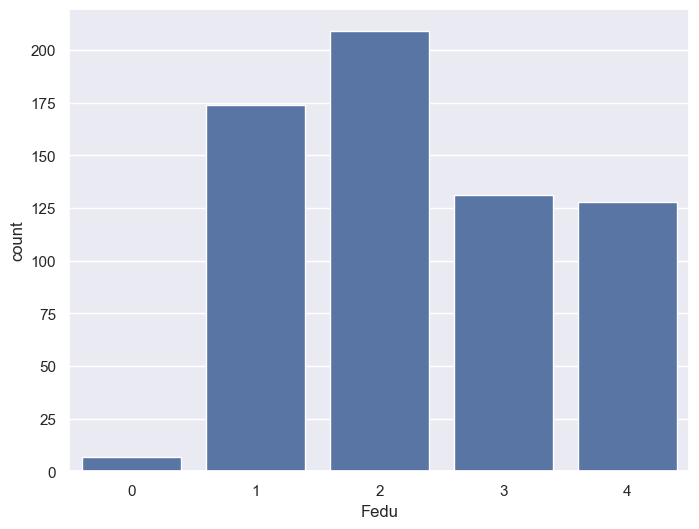

In [21]:
sns.countplot(data=por, x='Fedu')

<Axes: xlabel='Medu', ylabel='count'>

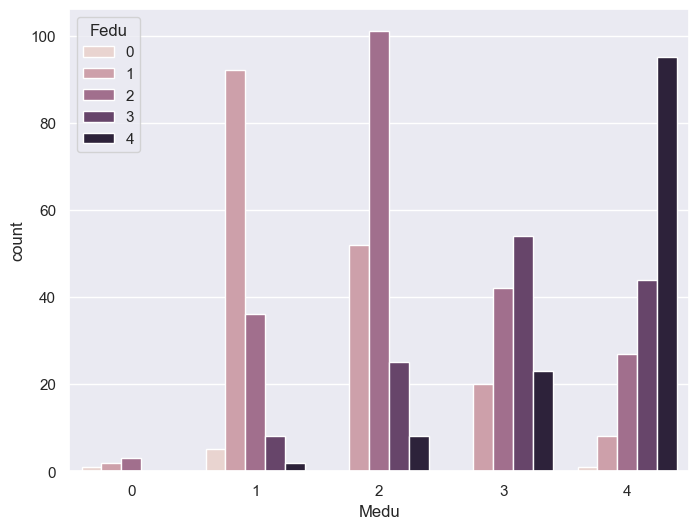

In [22]:
sns.countplot(x="Medu", hue ="Fedu", data=por)

<Axes: xlabel='Mjob', ylabel='count'>

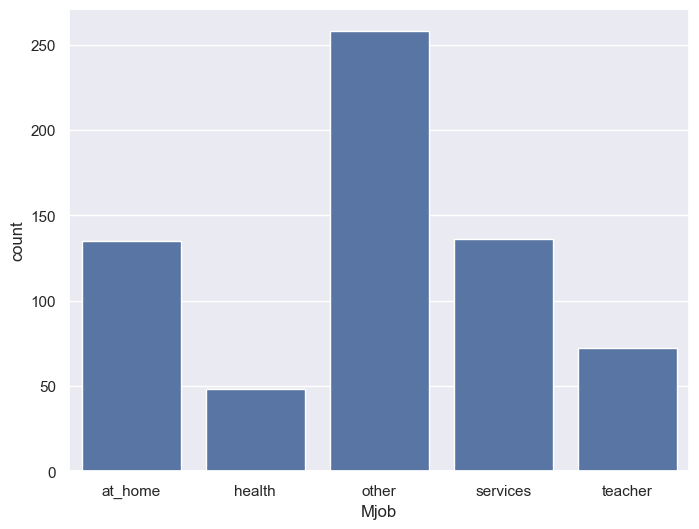

In [23]:
sns.countplot(data=por, x='Mjob')

In [24]:
por.Mjob.value_counts(normalize=True)

Mjob
other       0.397535
services    0.209553
at_home     0.208012
teacher     0.110940
health      0.073960
Name: proportion, dtype: float64

In [25]:
print("%s%% of the mothers are at home" % (100*round(por.Mjob.value_counts(normalize=True)[2],4)))

20.8% of the mothers are at home


<Axes: xlabel='Fjob', ylabel='count'>

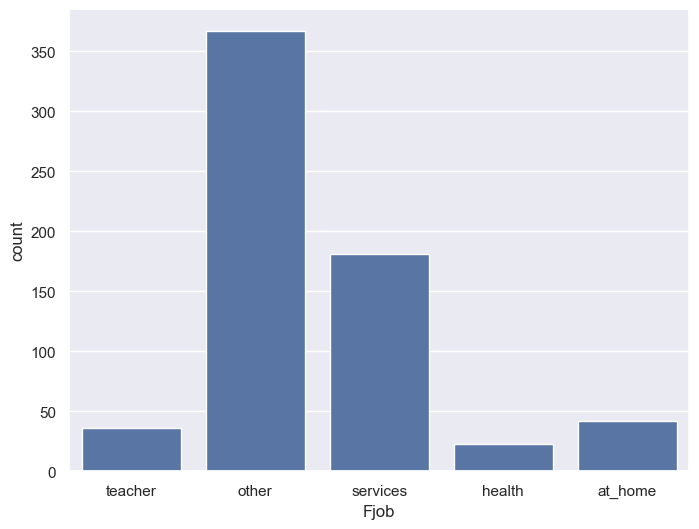

In [26]:
sns.countplot(data=por, x='Fjob')

In [27]:
por.Fjob.value_counts(normalize=True)

Fjob
other       0.565485
services    0.278891
at_home     0.064715
teacher     0.055470
health      0.035439
Name: proportion, dtype: float64

In [28]:
print("%s%% of the fathers are at home" % (100*round(por.Fjob.value_counts(normalize=True)[2],4)))

6.47% of the fathers are at home


<Axes: xlabel='Mjob', ylabel='count'>

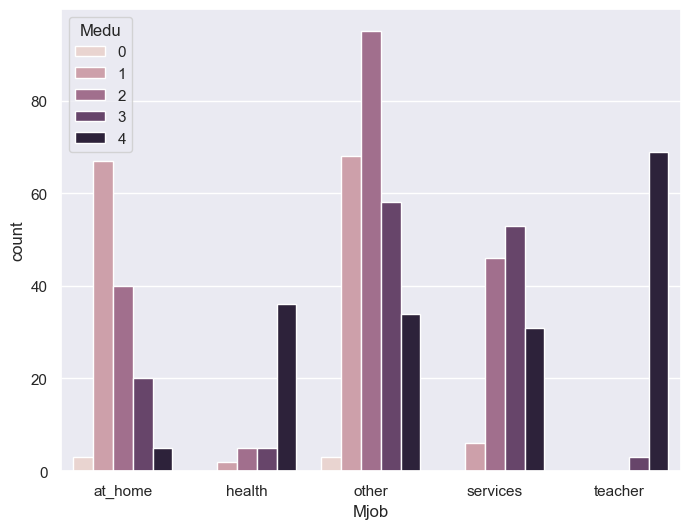

In [29]:
sns.countplot(x="Mjob", hue ="Medu", data=por)

<Axes: xlabel='Fjob', ylabel='count'>

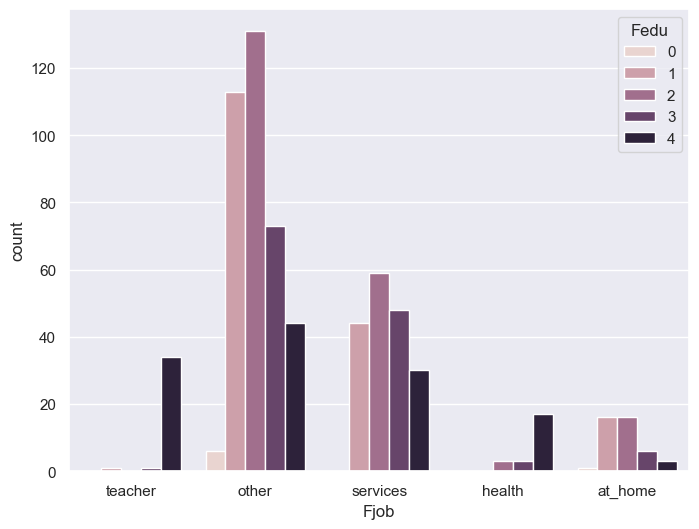

In [30]:
sns.countplot(x="Fjob", hue ="Fedu", data=por)

<Axes: xlabel='reason', ylabel='count'>

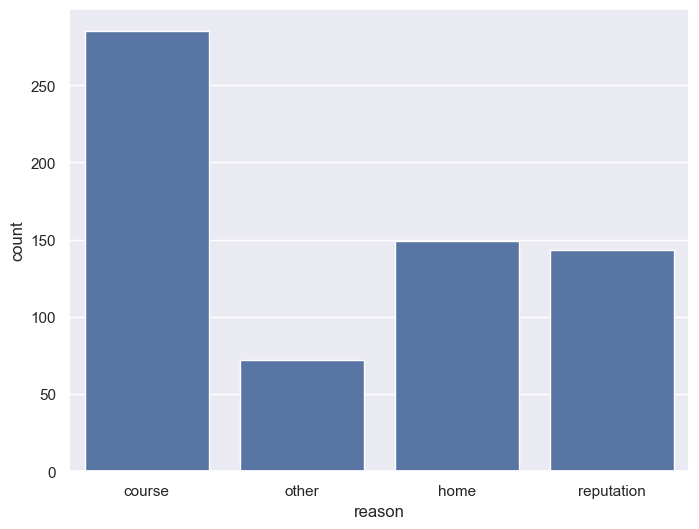

In [31]:
sns.countplot(data=por, x='reason')

Disimpulkan bahwa murid memilih sekolah berdasarkan mata pelajaran yang ada di sekolah tersebut

In [32]:
por.guardian.value_counts(normalize=True)

guardian
mother    0.701079
father    0.235747
other     0.063174
Name: proportion, dtype: float64

<Axes: xlabel='age', ylabel='count'>

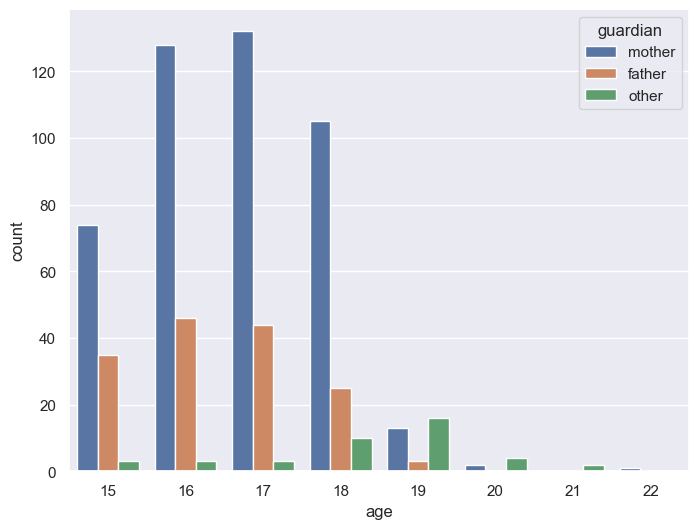

In [33]:
sns.countplot(x="age", hue ="guardian", data=por)

Disimpulkan bahwa murid mayoritas lebih dekan dengan ibu nya

<Axes: xlabel='traveltime', ylabel='count'>

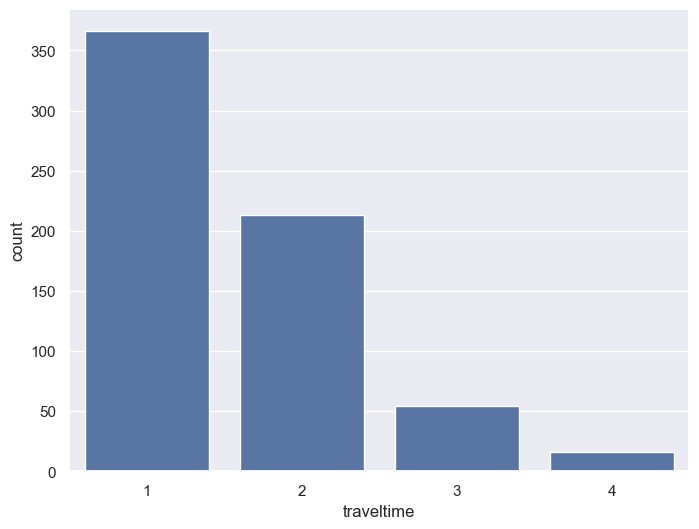

In [34]:
sns.countplot(data = por, x='traveltime')

Disimpulkan bahwa murid mayoritas memiliki jarak <15 menit dari tempat tinggal mereka dengan sekolah

<Axes: xlabel='address', ylabel='count'>

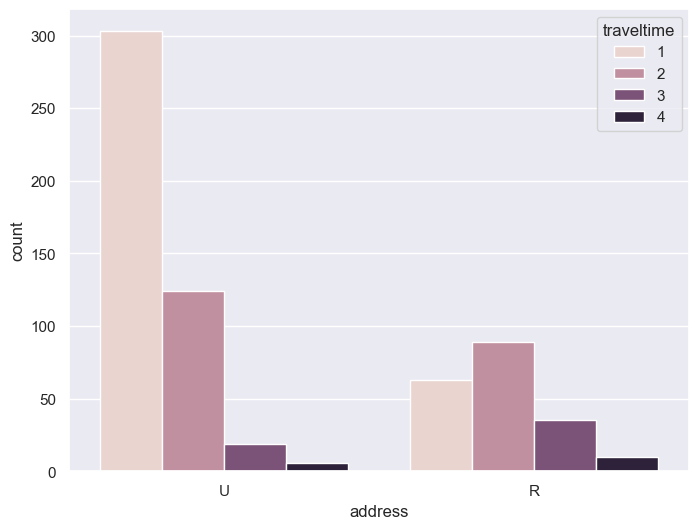

In [35]:
sns.countplot(x="address", hue ="traveltime", data=por)

<Axes: xlabel='school', ylabel='count'>

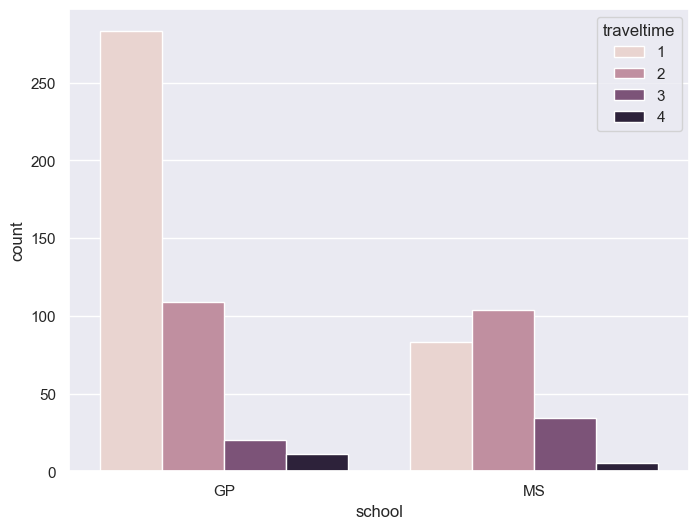

In [36]:
sns.countplot(x="school", hue ="traveltime", data=por)

<Axes: xlabel='studytime', ylabel='count'>

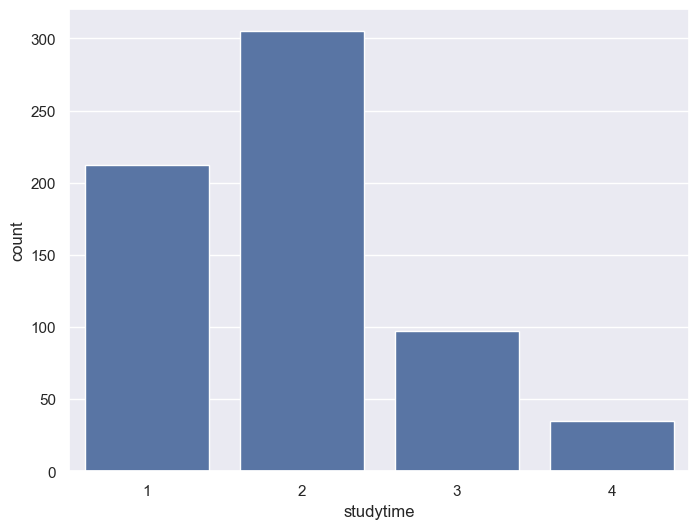

In [37]:
sns.countplot(data=por, x='studytime')

<Axes: xlabel='school', ylabel='count'>

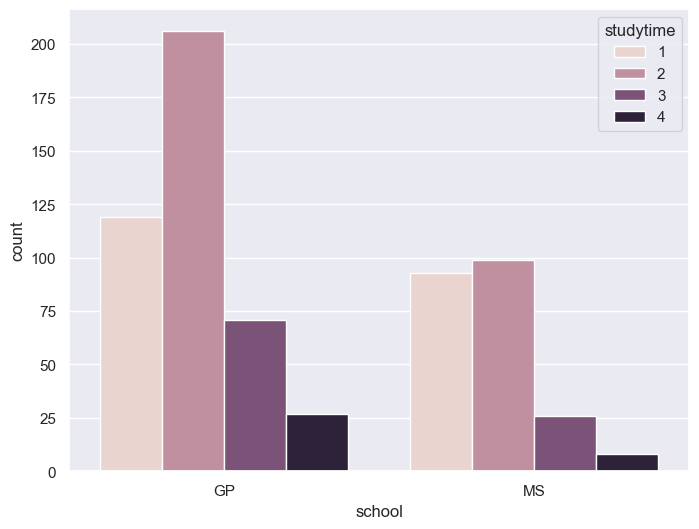

In [38]:
sns.countplot(x="school", hue ="studytime", data=por)

<Axes: xlabel='failures', ylabel='count'>

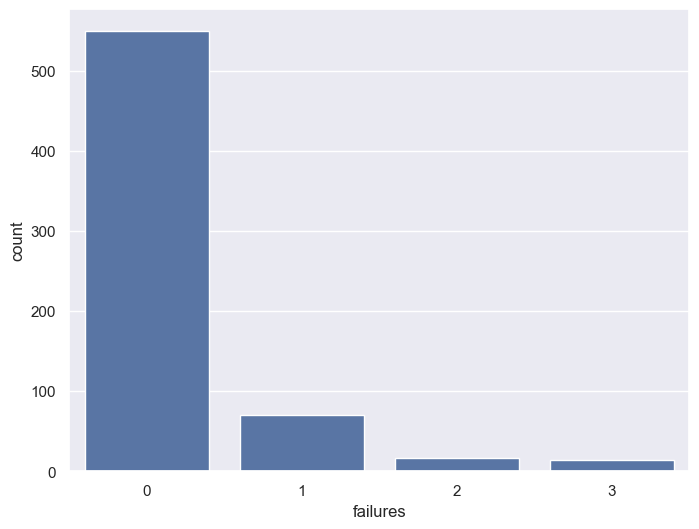

In [39]:
sns.countplot(data= por, x='failures')

<Axes: xlabel='age', ylabel='count'>

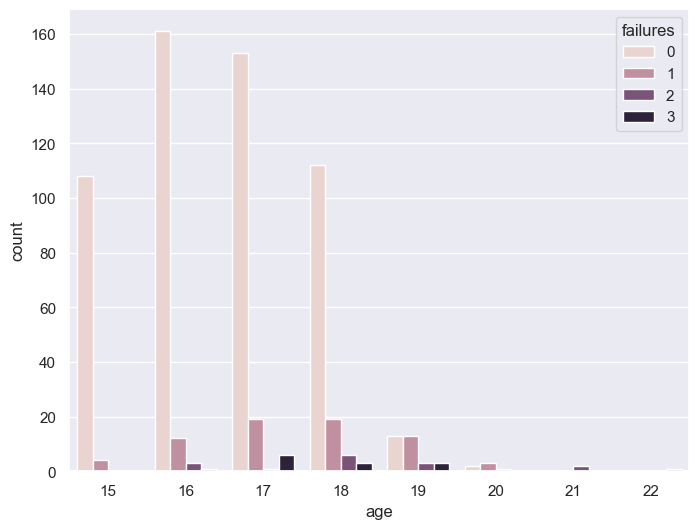

In [40]:
sns.countplot(x="age", hue="failures", data=por)

In [41]:
por.schoolsup.value_counts(normalize=True)

schoolsup
no     0.895223
yes    0.104777
Name: proportion, dtype: float64

In [42]:
por.famsup.value_counts(normalize=True)

famsup
yes    0.613251
no     0.386749
Name: proportion, dtype: float64

<Axes: xlabel='school', ylabel='count'>

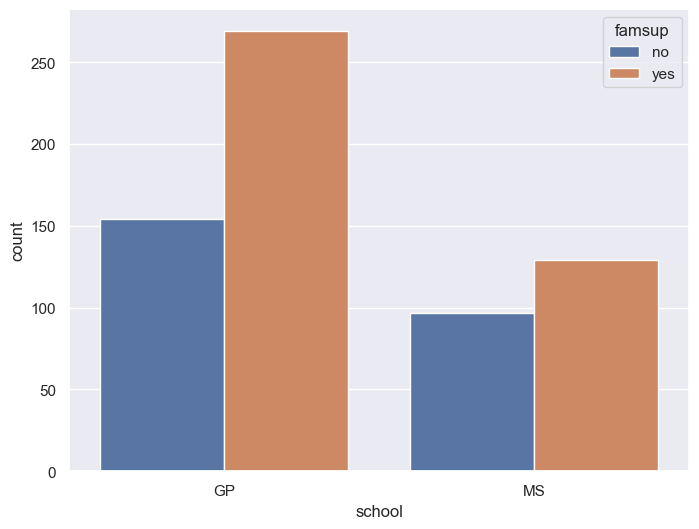

In [43]:
sns.countplot(x="school", hue="famsup", data=por)

In [44]:
por.paid.value_counts(normalize=True)

paid
no     0.939908
yes    0.060092
Name: proportion, dtype: float64

<Axes: xlabel='famsup', ylabel='count'>

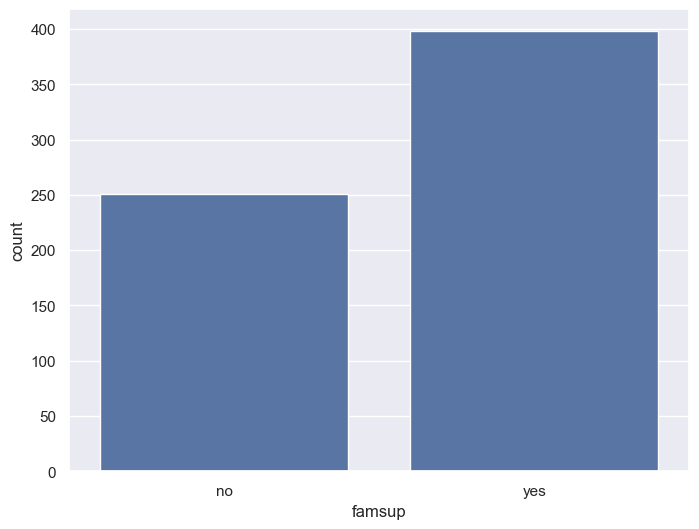

In [45]:
sns.countplot(data=por, x='famsup')

In [46]:
por.activities.value_counts(normalize=True)

activities
no     0.514638
yes    0.485362
Name: proportion, dtype: float64

<Axes: xlabel='sex', ylabel='count'>

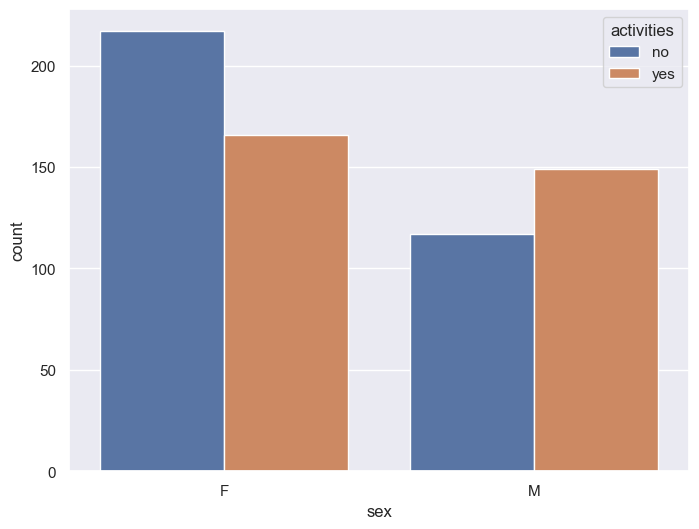

In [47]:
sns.countplot(x="sex", hue="activities", data=por)

In [48]:
por.nursery.value_counts(normalize=True)

nursery
yes    0.802773
no     0.197227
Name: proportion, dtype: float64

<Axes: xlabel='Medu', ylabel='count'>

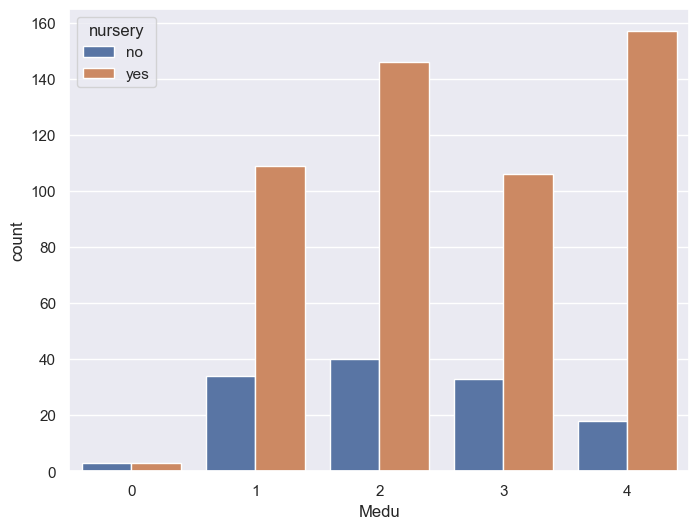

In [49]:
sns.countplot(x="Medu", hue="nursery", data=por)

In [50]:
por.higher.value_counts(normalize=True)

higher
yes    0.893683
no     0.106317
Name: proportion, dtype: float64

<Axes: xlabel='failures', ylabel='count'>

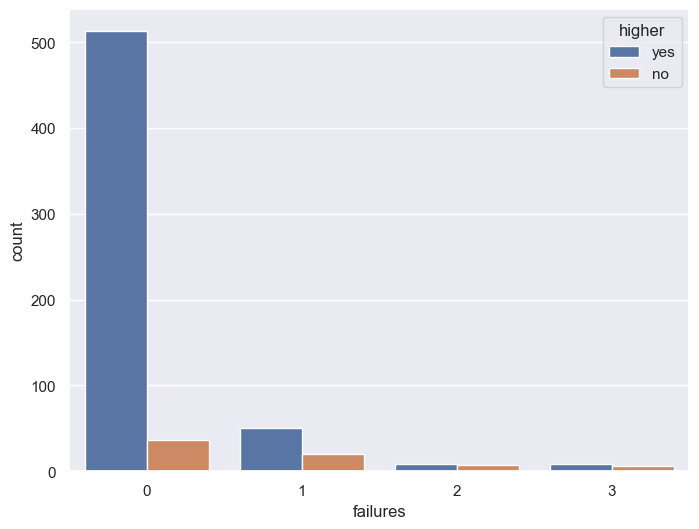

In [51]:
sns.countplot(x="failures", hue="higher", data=por)

<Axes: xlabel='age', ylabel='count'>

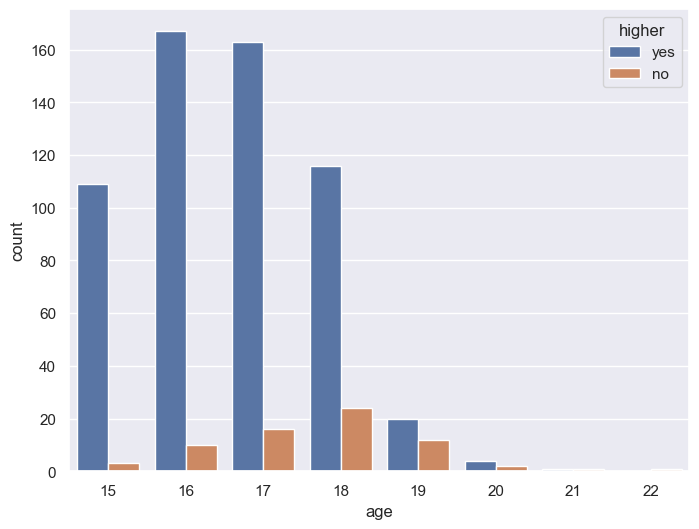

In [52]:
sns.countplot(x="age", hue="higher", data=por)

In [53]:
por.internet.value_counts(normalize=True)

internet
yes    0.767334
no     0.232666
Name: proportion, dtype: float64

<Axes: xlabel='Medu', ylabel='count'>

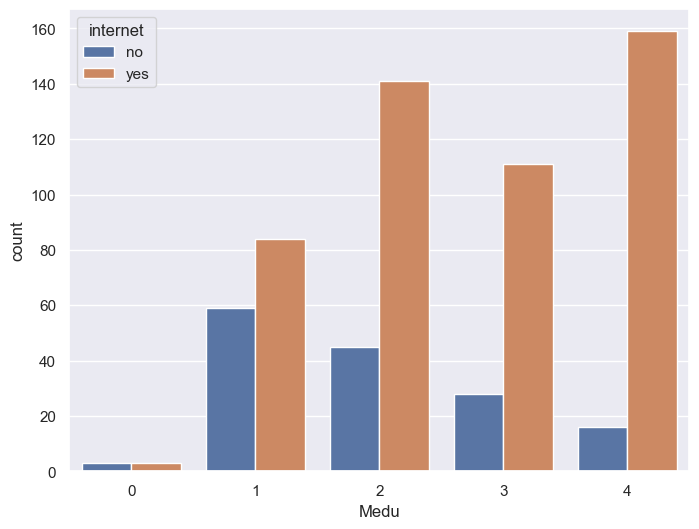

In [54]:
sns.countplot(x="Medu", hue="internet", data=por)

<Axes: xlabel='Mjob', ylabel='count'>

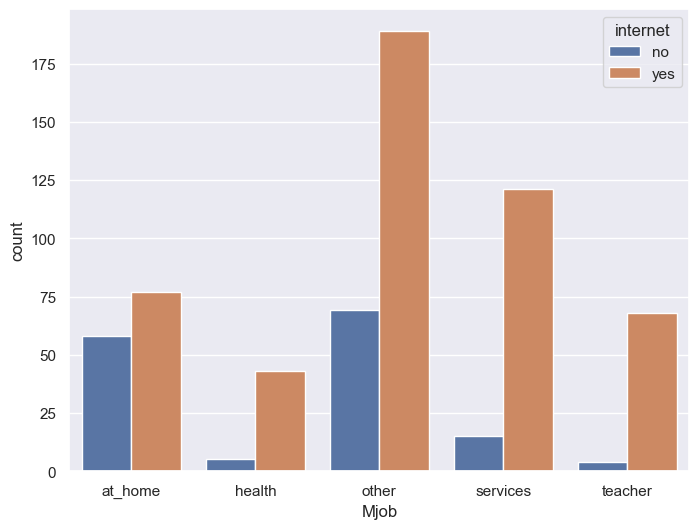

In [55]:
sns.countplot(x="Mjob", hue="internet", data=por)

<Axes: xlabel='school', ylabel='count'>

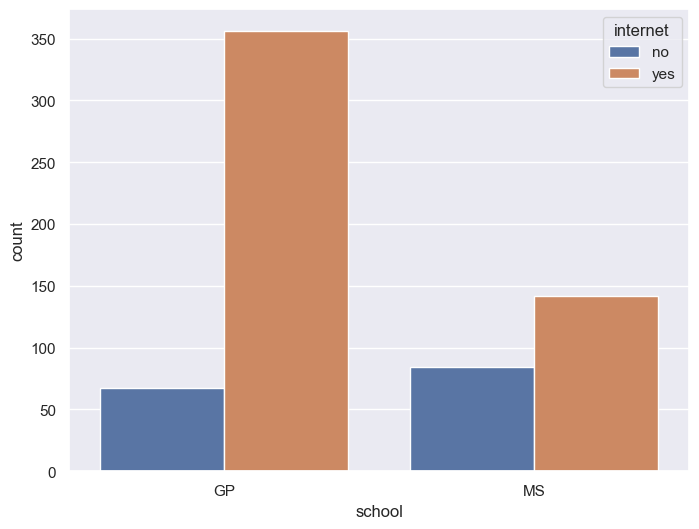

In [56]:
sns.countplot(x="school", hue="internet", data=por)

In [57]:
por.romantic.value_counts(normalize=True)

romantic
no     0.631741
yes    0.368259
Name: proportion, dtype: float64

<Axes: xlabel='age', ylabel='count'>

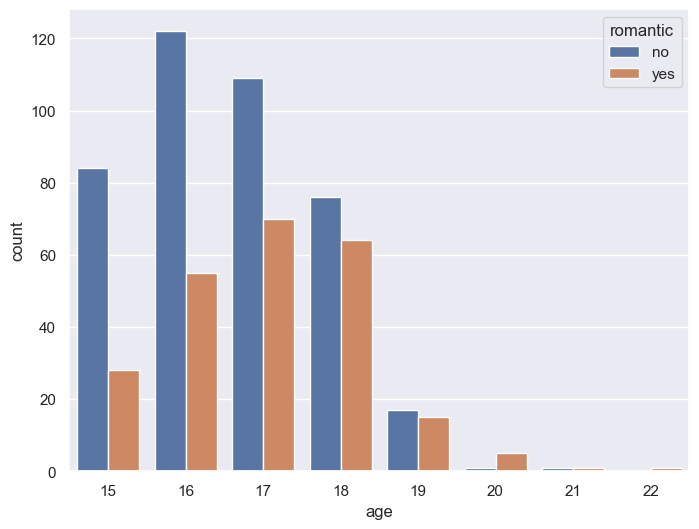

In [58]:
sns.countplot(x="age", hue="romantic", data=por)

<Axes: xlabel='famrel', ylabel='count'>

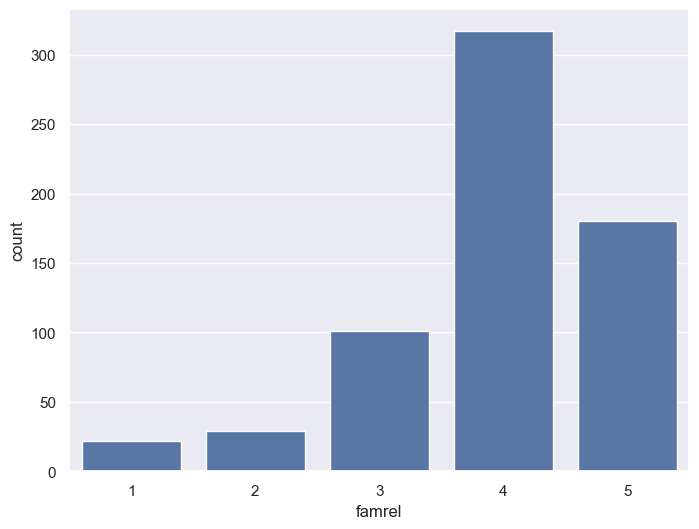

In [59]:
sns.countplot(data=por, x='famrel')

<Axes: xlabel='freetime', ylabel='count'>

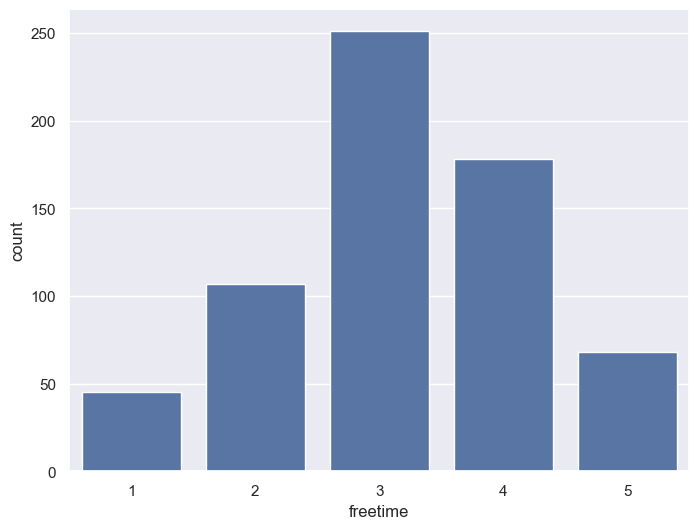

In [60]:
sns.countplot(data=por, x='freetime')

In [61]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


<Axes: xlabel='goout', ylabel='count'>

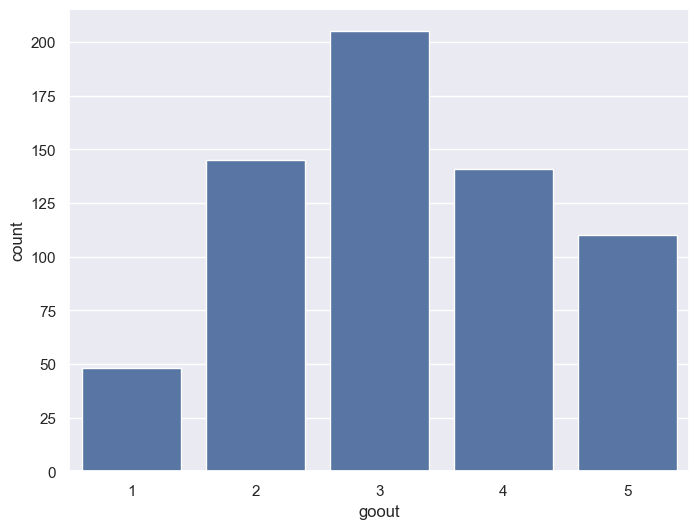

In [62]:
sns.countplot(data=por, x='goout')

<Axes: xlabel='freetime', ylabel='count'>

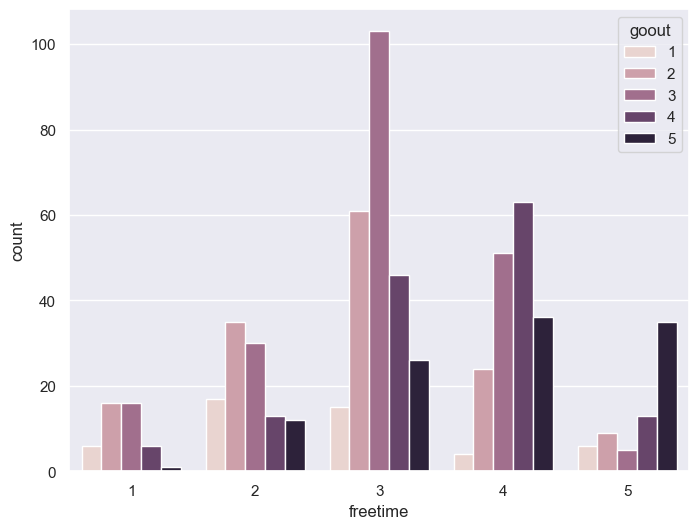

In [63]:
sns.countplot(x="freetime", hue="goout", data=por)

<Axes: xlabel='Dalc', ylabel='count'>

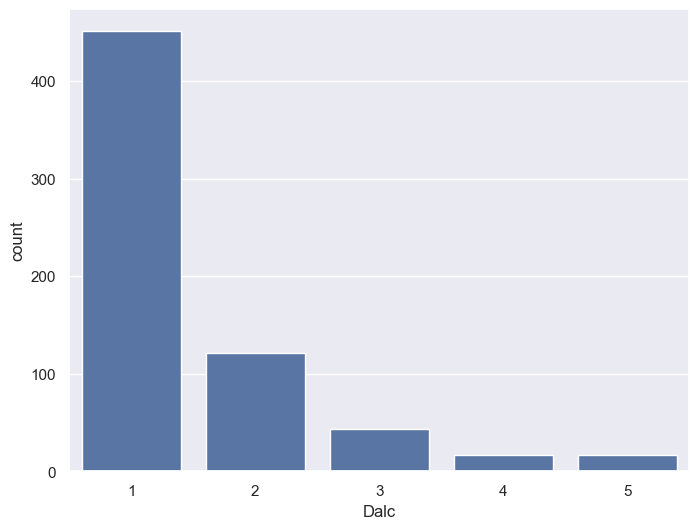

In [64]:
sns.countplot(data=por, x='Dalc')

<Axes: xlabel='goout', ylabel='count'>

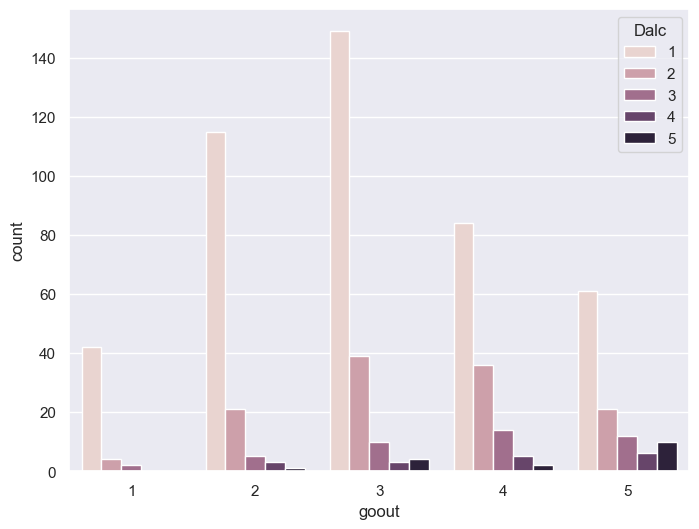

In [65]:
sns.countplot(x="goout", hue="Dalc", data=por)

<Axes: xlabel='sex', ylabel='count'>

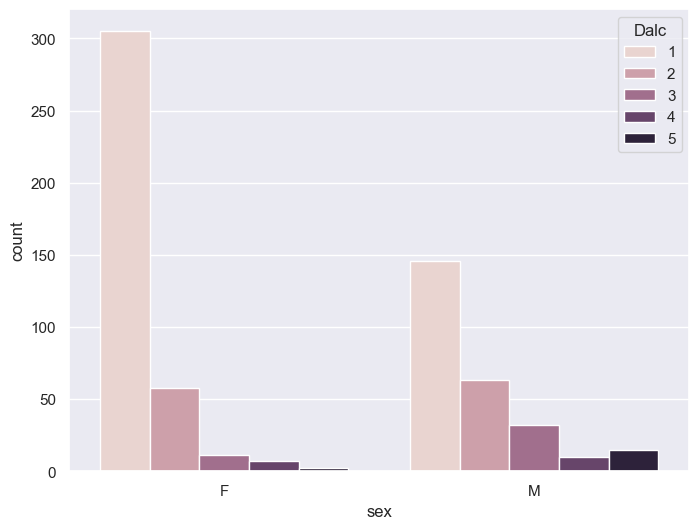

In [66]:
sns.countplot(x="sex", hue="Dalc", data=por)

<Axes: xlabel='Walc', ylabel='count'>

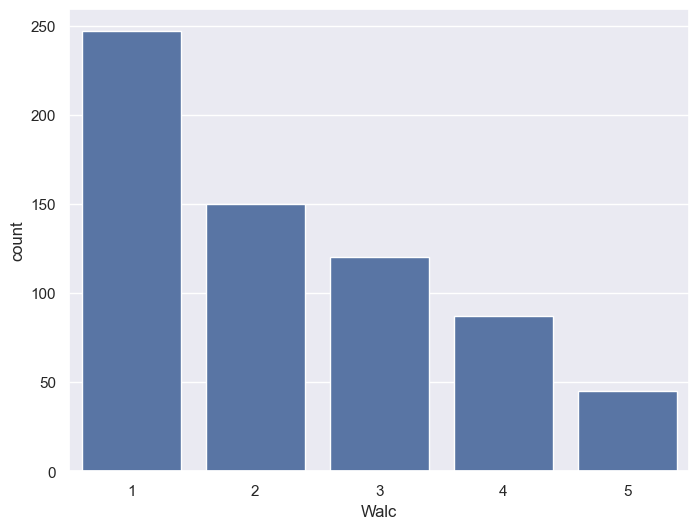

In [67]:
sns.countplot(data = por, x='Walc')

<Axes: xlabel='Dalc', ylabel='count'>

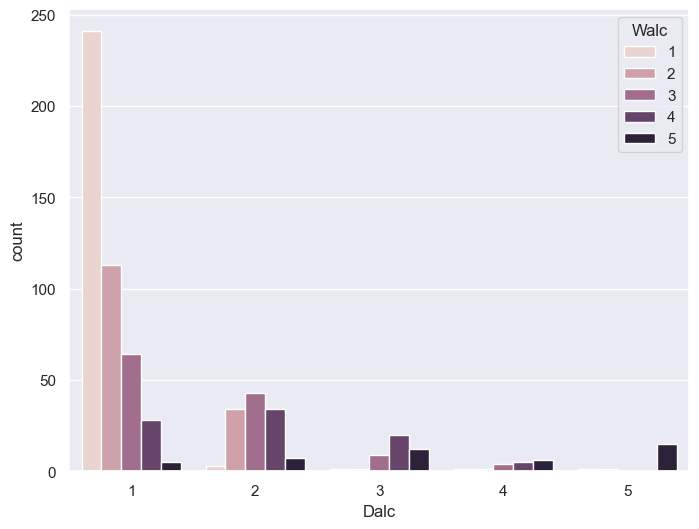

In [68]:
sns.countplot(x="Dalc", hue="Walc", data=por)

<Axes: xlabel='health', ylabel='count'>

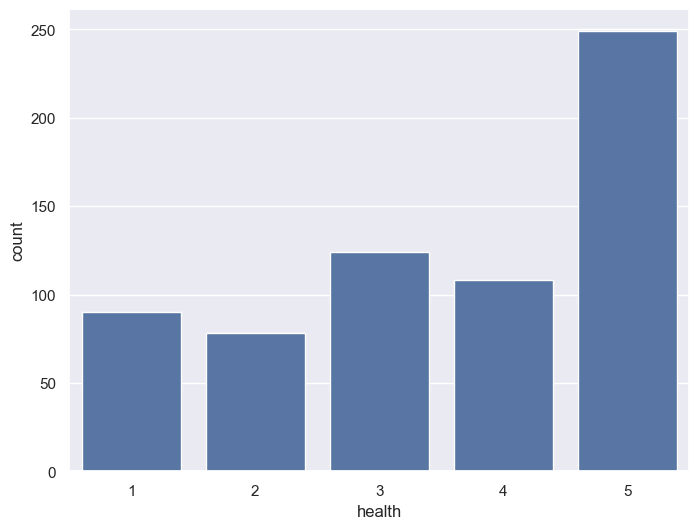

In [69]:
sns.countplot(data = por, x='health')

<Axes: xlabel='sex', ylabel='count'>

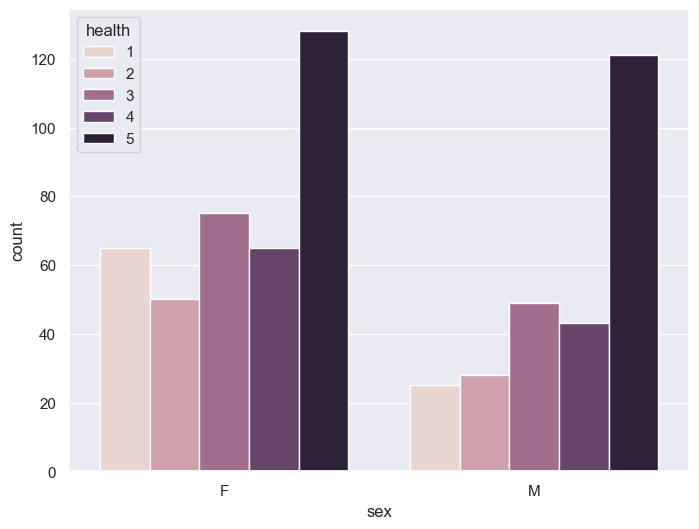

In [70]:
sns.countplot(x="sex", hue="health", data=por)

<Axes: xlabel='Walc', ylabel='count'>

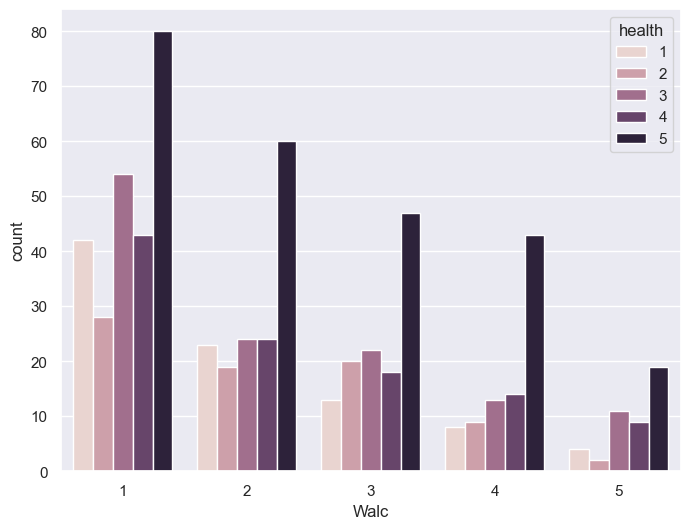

In [71]:
sns.countplot(x="Walc", hue="health", data=por)

<Axes: xlabel='absences', ylabel='Density'>

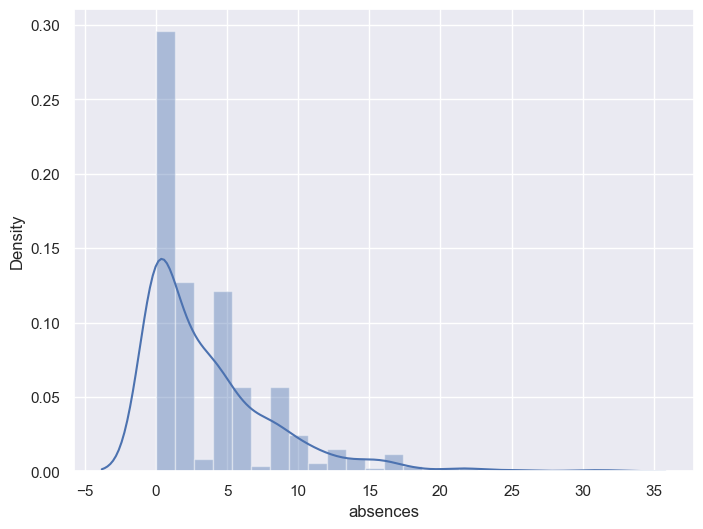

In [72]:
sns.distplot(por.absences)

In [73]:
por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [74]:
# por['Total_Grades'] = por['G1'] + por['G2'] + por['G3']

In [75]:
# sns.distplot(por.Total_Grades)

In [76]:
# GP = por[por.school == 'GP']
# MS = por[por.school == 'MS']

# sns.distplot(GP.Total_Grades, hist=False, label="GP")
# sns.distplot(MS.Total_Grades, hist=False, label="MS")
# plt.show()

In [77]:
por['school'] = por['school'].map({'GP': 0, 'MS': 1}).astype(int)
por['sex'] = por['sex'].map({'M': 0, 'F': 1}).astype(int)
por['address'] = por['address'].map({'R': 0, 'U': 1}).astype(int)
por['famsize'] = por['famsize'].map({'LE3': 0, 'GT3': 1}).astype(int)
por['Pstatus'] = por['Pstatus'].map({'A': 0, 'T': 1}).astype(int)
por['Mjob'] = por['Mjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
por['Fjob'] = por['Fjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
por['reason'] = por['reason'].map({'course': 0, 'other': 1, 'home': 2, 'reputation': 3}).astype(int)
por['guardian'] = por['guardian'].map({'mother': 0, 'father': 1, 'other': 2}).astype(int)
por['schoolsup'] = por['schoolsup'].map({'no': 0, 'yes': 1}).astype(int)
por['famsup'] = por['famsup'].map({'no': 0, 'yes': 1}).astype(int)
por['paid'] = por['paid'].map({'no': 0, 'yes': 1}).astype(int)
por['activities'] = por['activities'].map({'no': 0, 'yes': 1}).astype(int)
por['nursery'] = por['nursery'].map({'no': 0, 'yes': 1}).astype(int)
por['higher'] = por['higher'].map({'no': 0, 'yes': 1}).astype(int)
por['internet'] = por['internet'].map({'no': 0, 'yes': 1}).astype(int)
por['romantic'] = por['romantic'].map({'no': 0, 'yes': 1}).astype(int)

In [78]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,1,1,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,1,17,1,1,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,1,15,1,0,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,1,15,1,1,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,1,16,1,1,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


In [79]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,1,1,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,1,17,1,1,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,1,15,1,0,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,1,15,1,1,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,1,16,1,1,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


In [80]:
def define_grade(data):
    grades = []
    
    for row in data['G3']:
        if row >= 18:
            grades.append('A')
        elif row >= 14:
            grades.append('B')
        elif row >= 10:
            grades.append('C')
        elif row == 10:
            grades.append('D')              ##
        if row < 10:
            grades.append('E')
    data['grades'] = grades
    return data

In [81]:
por = define_grade(por)
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grades
0,0,1,18,1,1,0,4,4,0,4,...,3,4,1,1,3,4,0,11,11,C
1,0,1,17,1,1,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,C
2,0,1,15,1,0,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,C
3,0,1,15,1,1,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,B
4,0,1,16,1,1,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,C


In [82]:
por['grades'] = preprocessing.LabelEncoder().fit_transform(por['grades'])

Grades Prediction

In [83]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grades
0,0,1,18,1,1,0,4,4,0,4,...,3,4,1,1,3,4,0,11,11,2
1,0,1,17,1,1,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,2
2,0,1,15,1,0,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,2
3,0,1,15,1,1,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,1
4,0,1,16,1,1,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,2


In [84]:
data_new_por = por.drop(['grades', 'G3'], axis=1)

In [85]:
data_new_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,1,18,1,1,0,4,4,0,4,...,0,4,3,4,1,1,3,4,0,11
1,0,1,17,1,1,1,1,1,0,2,...,0,5,3,3,1,1,3,2,9,11
2,0,1,15,1,0,1,1,1,0,2,...,0,4,3,2,2,3,3,6,12,13
3,0,1,15,1,1,1,4,2,1,3,...,1,3,2,2,1,1,5,0,14,14
4,0,1,16,1,1,1,3,3,2,2,...,0,4,3,2,1,2,5,0,11,13


In [86]:
# Droping grades because they are too correlated and can bias the model
X = data_new_por
y = por['grades']

In [87]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,1,18,1,1,0,4,4,0,4,...,0,4,3,4,1,1,3,4,0,11
1,0,1,17,1,1,1,1,1,0,2,...,0,5,3,3,1,1,3,2,9,11
2,0,1,15,1,0,1,1,1,0,2,...,0,4,3,2,2,3,3,6,12,13
3,0,1,15,1,1,1,4,2,1,3,...,1,3,2,2,1,1,5,0,14,14
4,0,1,16,1,1,1,3,3,2,2,...,0,4,3,2,1,2,5,0,11,13


In [88]:
y.head()

0    2
1    2
2    2
3    1
4    2
Name: grades, dtype: int32

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

y_test = y_test.astype(float)
predicted = predicted.astype(float)

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [92]:
predicted = knn.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.81      0.81      0.81        36
           2       0.83      0.96      0.89        71
           3       0.80      0.53      0.64        15

    accuracy                           0.82       130
   macro avg       0.86      0.64      0.68       130
weighted avg       0.83      0.82      0.81       130



In [93]:
predicted = knn.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f"Akurasi prediksi: {accuracy:.4f}")

Akurasi prediksi: 0.8231


In [94]:
from sklearn.naive_bayes import MultinomialNB

naive_baiyes = MultinomialNB()
naive_baiyes.fit(X_train, y_train)

MultinomialNB()

In [95]:
predicted = naive_baiyes.predict(X_test)
print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.55      0.67      0.60        36
           2       0.72      0.72      0.72        71
           3       0.47      0.47      0.47        15

    accuracy                           0.63       130
   macro avg       0.43      0.46      0.45       130
weighted avg       0.60      0.63      0.61       130



In [96]:
predicted = naive_baiyes.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

# Cetak akurasi dengan 4 angka di belakang koma
print(f"Akurasi prediksi: {accuracy:.4f}")

Akurasi prediksi: 0.6308


In [97]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [98]:
predicted = rf_classifier.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.78      0.81      0.79        36
           2       0.85      0.93      0.89        71
           3       0.71      0.67      0.69        15

    accuracy                           0.82       130
   macro avg       0.84      0.63      0.65       130
weighted avg       0.82      0.82      0.80       130



In [99]:
predicted = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

# Cetak akurasi dengan 4 angka di belakang koma
print(f"Akurasi prediksi: {accuracy:.4f}")

Akurasi prediksi: 0.8154


In [100]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [101]:
predicted = svc.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

# Cetak akurasi dengan 4 angka di belakang koma
print(f"Akurasi prediksi: {accuracy:.4f}")

Akurasi prediksi: 0.8000


In [102]:
predicted = svc.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.75      0.83      0.79        36
           2       0.83      0.94      0.88        71
           3       0.78      0.47      0.58        15

    accuracy                           0.80       130
   macro avg       0.59      0.56      0.56       130
weighted avg       0.75      0.80      0.77       130



In [103]:
#Neural Network
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [104]:
predicted = mlp.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

# Cetak akurasi dengan 4 angka di belakang koma
print(f"Akurasi prediksi: {accuracy:.4f}")

Akurasi prediksi: 0.7692


In [105]:
predicted = mlp.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.72      0.81      0.76        36
           2       0.82      0.86      0.84        71
           3       0.60      0.60      0.60        15

    accuracy                           0.77       130
   macro avg       0.79      0.60      0.61       130
weighted avg       0.78      0.77      0.75       130



In [106]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

GBoost= GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

GBoost.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [107]:
predicted = GBoost.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

# Cetak akurasi dengan 4 angka di belakang koma
print(f"Akurasi prediksi: {accuracy:.4f}")

Akurasi prediksi: 0.7923


In [108]:
predicted = GBoost.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.78      0.78      0.78        36
           2       0.85      0.82      0.83        71
           3       0.61      0.73      0.67        15

    accuracy                           0.79       130
   macro avg       0.75      0.77      0.76       130
weighted avg       0.80      0.79      0.79       130



In [109]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [110]:
predicted = lda.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

# Cetak akurasi dengan 4 angka di belakang koma
print(f"Akurasi prediksi: {accuracy:.4f}")

Akurasi prediksi: 0.8000


In [111]:
predicted = lda.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.75      0.83      0.79        36
           2       0.87      0.86      0.87        71
           3       0.67      0.67      0.67        15

    accuracy                           0.80       130
   macro avg       0.72      0.68      0.70       130
weighted avg       0.80      0.80      0.80       130



In [112]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Inisialisasi model dengan kernel RBF (Gaussian Kernel)
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)
gpc.fit(X_train, y_train)


GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=0)

In [113]:
predicted = gpc.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

# Cetak akurasi dengan 4 angka di belakang koma
print(f"Akurasi prediksi: {accuracy:.4f}")

Akurasi prediksi: 0.7923


In [114]:
predicted = gpc.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.78      0.81      0.79        36
           2       0.83      0.87      0.85        71
           3       0.60      0.60      0.60        15

    accuracy                           0.79       130
   macro avg       0.80      0.66      0.70       130
weighted avg       0.80      0.79      0.79       130



In [115]:
import xgboost as xgb

XGB = xgb.XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)
XGB.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
predicted = XGB.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

# Cetak akurasi dengan 4 angka di belakang koma
print(f"Akurasi prediksi: {accuracy:.4f}")

Akurasi prediksi: 0.8077


In [ ]:
predicted = XGB.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         8
         1.0       0.83      0.81      0.82        36
         2.0       0.84      0.83      0.84        71
         3.0       0.58      0.73      0.65        15

    accuracy                           0.81       130
   macro avg       0.81      0.78      0.79       130
weighted avg       0.82      0.81      0.81       130



In [ ]:
from sklearn.naive_bayes import GaussianNB


GaussianNB = GaussianNB()
GaussianNB.fit(X_train, y_train)

GaussianNB()

In [ ]:
predicted = GaussianNB.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

# Cetak akurasi dengan 4 angka di belakang koma
print(f"Akurasi prediksi: {accuracy:.4f}")

Akurasi prediksi: 0.5462


In [ ]:
predicted = GaussianNB.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.23      0.88      0.36         8
         1.0       0.34      0.31      0.32        36
         2.0       0.91      0.58      0.71        71
         3.0       0.55      0.80      0.65        15

    accuracy                           0.55       130
   macro avg       0.51      0.64      0.51       130
weighted avg       0.67      0.55      0.57       130



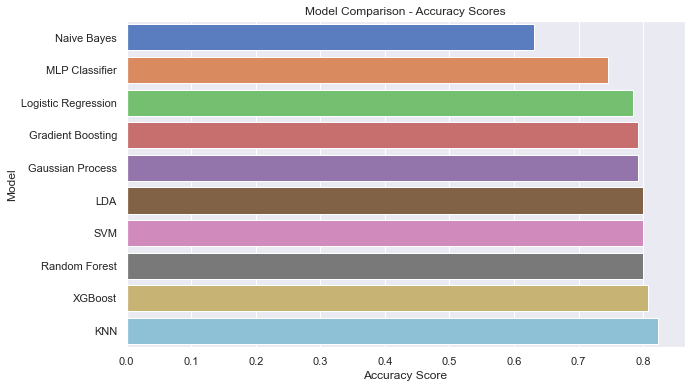

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
models = ['Naive Bayes', 'MLP Classifier', 'Logistic Regression', 'Gradient Boosting', 'Gaussian Process',
          'LDA', 'SVM', 'Random Forest', 'XGBoost', 'KNN']
accuracy_scores = [0.6308, 0.7462, 0.7846, 0.7923, 0.7923, 0.8000, 0.8000, 0.8000, 0.8077, 0.8231]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_scores, y=models, palette='muted')

# Add labels and title
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.title('Model Comparison - Accuracy Scores')

# Show the plot
plt.show()


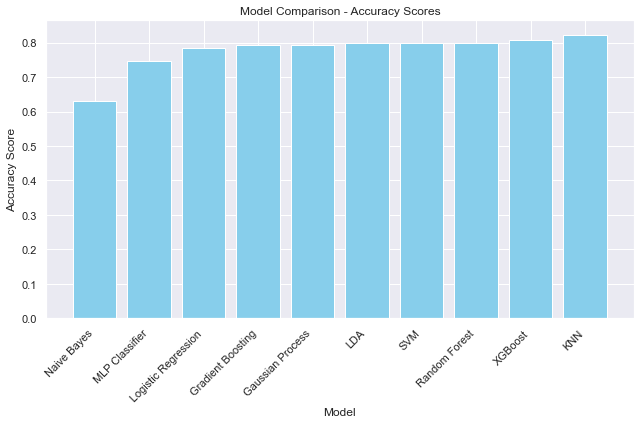

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['Naive Bayes', 'MLP Classifier', 'Logistic Regression', 'Gradient Boosting', 'Gaussian Process',
          'LDA', 'SVM', 'Random Forest', 'XGBoost', 'KNN']
accuracy_scores = [0.6308, 0.7462, 0.7846, 0.7923, 0.7923, 0.8000, 0.8000, 0.8000, 0.8077, 0.8231]

plt.figure(figsize=(9, 6))
plt.bar(models, accuracy_scores, color='skyblue')
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.title('Model Comparison - Accuracy Scores')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

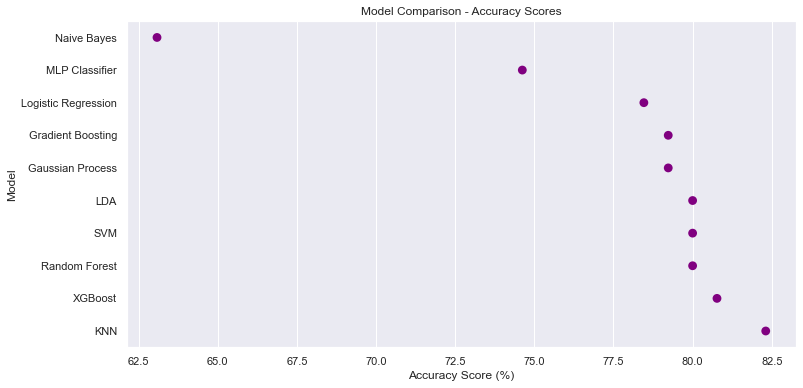

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
models = ['Naive Bayes', 'MLP Classifier', 'Logistic Regression', 'Gradient Boosting', 'Gaussian Process',
          'LDA', 'SVM', 'Random Forest', 'XGBoost', 'KNN']
accuracy_scores = [0.6308, 0.7462, 0.7846, 0.7923, 0.7923, 0.8000, 0.8000, 0.8000, 0.8077, 0.8231]

# Convert accuracy scores to percentages
accuracy_percentages = [score * 100 for score in accuracy_scores]

# Create a pointplot
plt.figure(figsize=(12, 6))
sns.pointplot(x=accuracy_percentages, y=models, color='purple', join=False)
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Model')
plt.title('Model Comparison - Accuracy Scores')
plt.show()


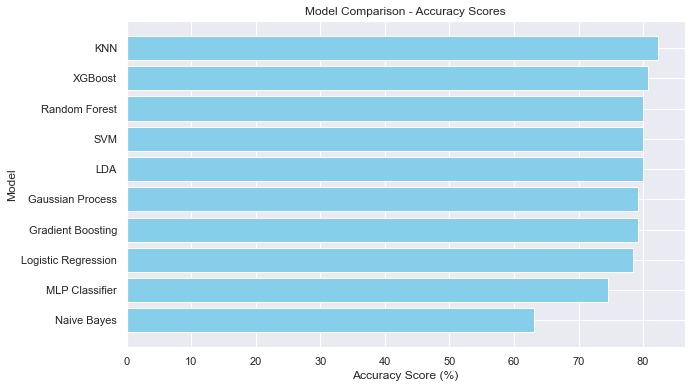

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['Naive Bayes', 'MLP Classifier', 'Logistic Regression', 'Gradient Boosting', 'Gaussian Process',
          'LDA', 'SVM', 'Random Forest', 'XGBoost', 'KNN']
accuracy_scores = [0.6308, 0.7462, 0.7846, 0.7923, 0.7923, 0.8000, 0.8000, 0.8000, 0.8077, 0.8231]

# Convert accuracy scores to percentages
accuracy_percentages = [score * 100 for score in accuracy_scores]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(models, accuracy_percentages, color='skyblue')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Model')
plt.title('Model Comparison - Accuracy Scores')
plt.show()


In [ ]:
import plotly.express as px

# Contoh Bar Chart Interaktif
fig = px.bar(por, x='age', y='health', color='health',
             labels={'Umur': 'Rata-rata Umur'}, title='Bar Chart Interaktif')
fig.show()


In [ ]:
import pandas as pd

# Find mutually exclusive attributes
mutually_exclusive_attributes = []

for column in por.columns:
    unique_values = por[column].unique()

    for other_column in por.columns:
        if column != other_column:
            other_unique_values = por[other_column].unique()

            # Check if the sets of unique values are mutually exclusive
            if set(unique_values).isdisjoint(other_unique_values):
                mutually_exclusive_attributes.append((column, other_column))

# Display mutually exclusive attributes
print("Mutually Exclusive Attributes:")
print(mutually_exclusive_attributes)


Mutually Exclusive Attributes:
[('school', 'age'), ('sex', 'age'), ('age', 'school'), ('age', 'sex'), ('age', 'address'), ('age', 'famsize'), ('age', 'Pstatus'), ('age', 'Medu'), ('age', 'Fedu'), ('age', 'Mjob'), ('age', 'Fjob'), ('age', 'reason'), ('age', 'guardian'), ('age', 'traveltime'), ('age', 'studytime'), ('age', 'failures'), ('age', 'schoolsup'), ('age', 'famsup'), ('age', 'paid'), ('age', 'activities'), ('age', 'nursery'), ('age', 'higher'), ('age', 'internet'), ('age', 'romantic'), ('age', 'famrel'), ('age', 'freetime'), ('age', 'goout'), ('age', 'Dalc'), ('age', 'Walc'), ('age', 'health'), ('age', 'grades'), ('address', 'age'), ('famsize', 'age'), ('Pstatus', 'age'), ('Medu', 'age'), ('Fedu', 'age'), ('Mjob', 'age'), ('Fjob', 'age'), ('reason', 'age'), ('guardian', 'age'), ('traveltime', 'age'), ('traveltime', 'G2'), ('studytime', 'age'), ('studytime', 'G2'), ('failures', 'age'), ('schoolsup', 'age'), ('famsup', 'age'), ('paid', 'age'), ('activities', 'age'), ('nursery', 'a

In [ ]:
correlation_school_age = por['school'].corr(por['age'])

print(f"Korelasi antara 'school' dan 'age': {correlation_school_age}")

Korelasi antara 'school' dan 'age': 0.08716967817434824


In [ ]:
correlation_matrix = df.corr()


In [ ]:
mutually_exclusive_attributes = [('school', 'age'), ('sex', 'age'), ('age', 'school'), ('age', 'sex'), ('age', 'address'), ('age', 'famsize'), ('age', 'Pstatus'), ('age', 'Medu'), ('age', 'Fedu'), ('age', 'Mjob'), ('age', 'Fjob'), ('age', 'reason'), ('age', 'guardian'), ('age', 'traveltime'), ('age', 'studytime'), ('age', 'failures'), ('age', 'schoolsup'), ('age', 'famsup'), ('age', 'paid'), ('age', 'activities'), ('age', 'nursery'), ('age', 'higher'), ('age', 'internet'), ('age', 'romantic'), ('age', 'famrel'), ('age', 'freetime'), ('age', 'goout'), ('age', 'Dalc'), ('age', 'Walc'), ('age', 'health'), ('age', 'grades'), ('address', 'age'), ('famsize', 'age'), ('Pstatus', 'age'), ('Medu', 'age'), ('Fedu', 'age'), ('Mjob', 'age'), ('Fjob', 'age'), ('reason', 'age'), ('guardian', 'age'), ('traveltime', 'age'), ('traveltime', 'G2'), ('studytime', 'age'), ('studytime', 'G2'), ('failures', 'age'), ('schoolsup', 'age'), ('famsup', 'age'), ('paid', 'age'), ('activities', 'age'), ('nursery', 'age'), ('higher', 'age'), ('internet', 'age'), ('romantic', 'age'), ('famrel', 'age'), ('freetime', 'age'), ('goout', 'age'), ('Dalc', 'age'), ('Walc', 'age'), ('health', 'age'), ('G2', 'traveltime'), ('G2', 'studytime'), ('grades', 'age')]

for pair in mutually_exclusive_attributes:
    correlation_coefficient = correlation_matrix.loc[pair[0], pair[1]]
    print(f"Correlation between {pair[0]} and {pair[1]}: {correlation_coefficient:.4f}")


Correlation between school and age: 0.0872
Correlation between sex and age: 0.0437
Correlation between age and school: 0.0872
Correlation between age and sex: 0.0437
Correlation between age and address: -0.0258
Correlation between age and famsize: 0.0025
Correlation between age and Pstatus: -0.0056
Correlation between age and Medu: -0.1078
Correlation between age and Fedu: -0.1211
Correlation between age and Mjob: -0.0718
Correlation between age and Fjob: -0.0508
Correlation between age and reason: -0.0286
Correlation between age and guardian: 0.1718
Correlation between age and traveltime: 0.0345
Correlation between age and studytime: -0.0084
Correlation between age and failures: 0.3200
Correlation between age and schoolsup: -0.1678
Correlation between age and famsup: -0.1019
Correlation between age and paid: -0.0055
Correlation between age and activities: -0.0543
Correlation between age and nursery: -0.0214
Correlation between age and higher: -0.2655
Correlation between age and intern

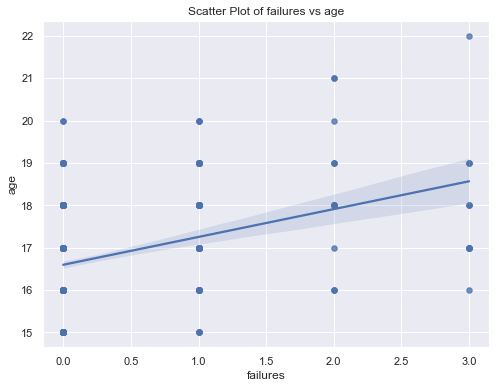

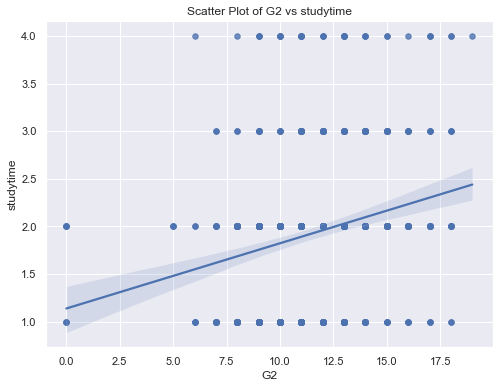

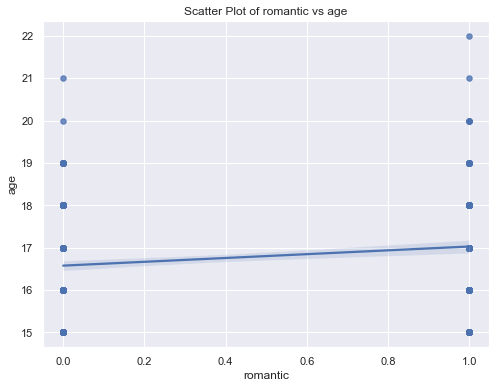

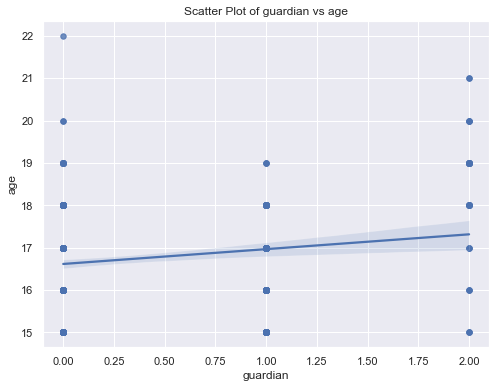

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df
# ... (load your data into df)

# Specify the pairs with the highest positive correlations
positive_correlation_pairs = [('failures', 'age'), ('G2', 'studytime'), ('romantic', 'age'), ('guardian', 'age')]

# Create scatter plots
for pair in positive_correlation_pairs:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=pair[0], y=pair[1], data=data_new_por, scatter_kws={'s': 30})
    plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()


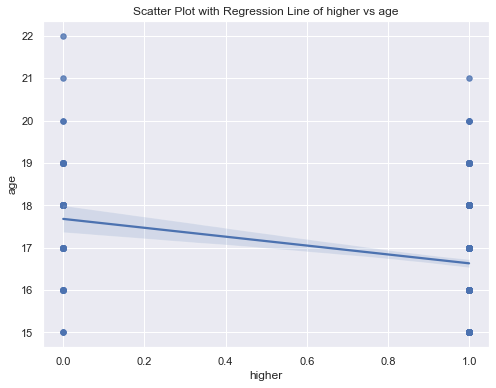

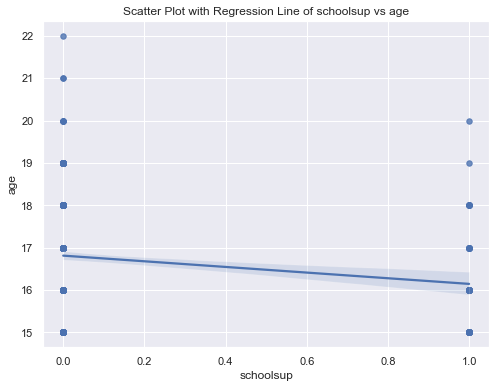

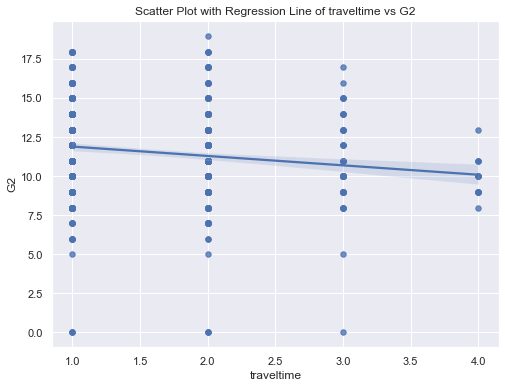

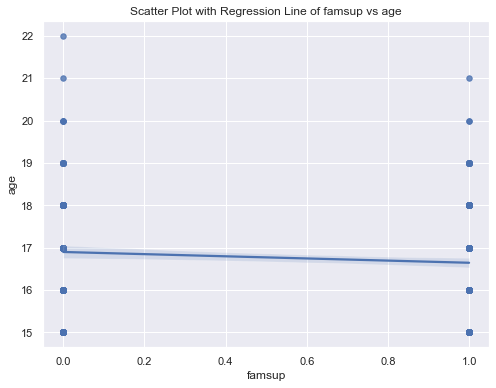

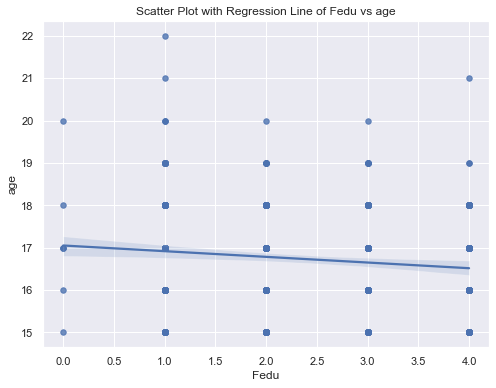

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df
# ... (load your data into df)

# Specify the pairs with the highest negative correlations
negative_correlation_pairs = [('higher', 'age'), ('schoolsup', 'age'), ('traveltime', 'G2'), ('famsup', 'age'), ('Fedu', 'age')]

# Create scatter plots with regression lines
for pair in negative_correlation_pairs:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=pair[0], y=pair[1],data=data_new_por, scatter_kws={'s': 30})  # 's' adjusts marker size
    plt.title(f'Scatter Plot with Regression Line of {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()


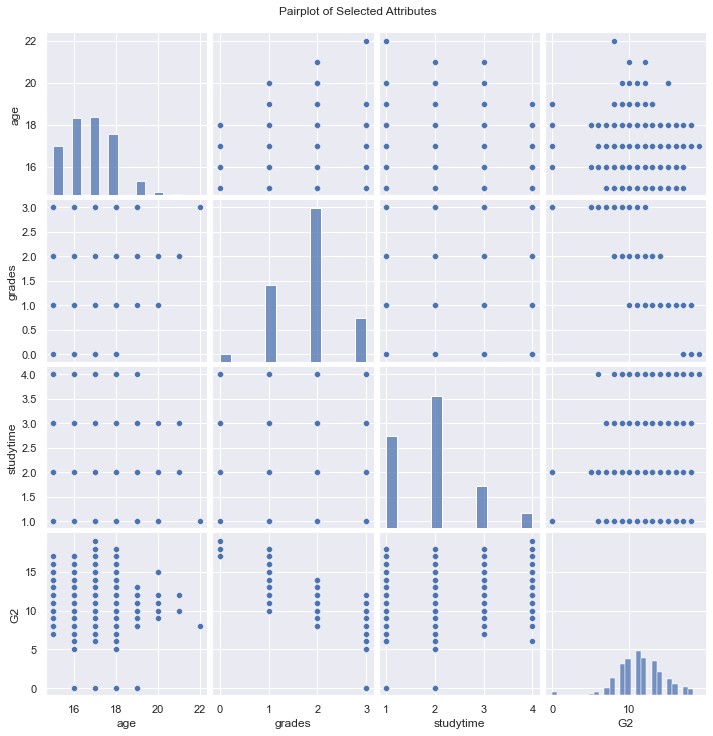

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Specify the columns you want to include in the pairplot
selected_columns = ['age', 'grades', 'studytime', 'G2']

# Create a pairplot
sns.pairplot(por[selected_columns])
plt.suptitle('Pairplot of Selected Attributes', y=1.02)
plt.show()

In [ ]:

# Set the following magic command to display plots inline in Jupyter Notebook
%matplotlib inline



In [ ]:
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

In [ ]:
# Contoh pasangan atribut yang bersifat saling eksklusif
mutually_exclusive_attributes = [('school', 'age'), ('sex', 'age'), ('age', 'school'), ('age', 'sex'), ('age', 'address')]

# Contoh DataFrame
data = {'school': ['GP', 'GP', 'MS', 'MS', 'GP'],
        'sex': ['F', 'M', 'F', 'F', 'M'],
        'age': [15, 16, 17, 15, 18],
        'address': ['R', 'U', 'R', 'U', 'R']}

df = pd.DataFrame(data)

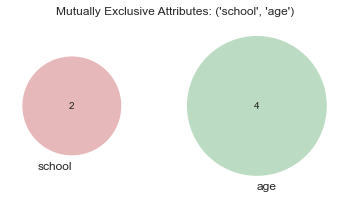

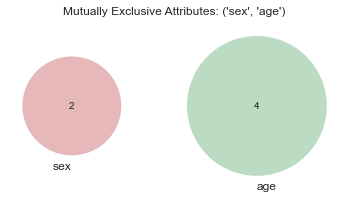

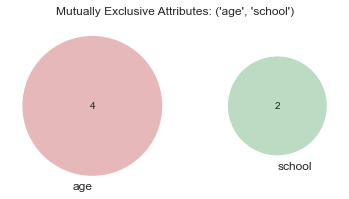

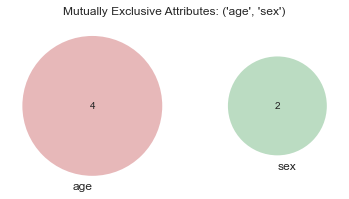

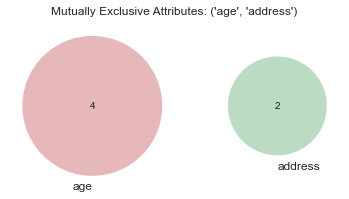

In [ ]:
for pair in mutually_exclusive_attributes:
    set1 = set(df[pair[0]].unique())
    set2 = set(df[pair[1]].unique())
    
    venn2([set1, set2], set_labels=(pair[0], pair[1]))
    plt.title(f'Mutually Exclusive Attributes: {pair}')
    plt.show()